## Data Science Work Flow

Python -> R? -> D3

In [2]:
# import the d3_module
import d3_example

# typical imports
# import requirments 
from IPython.display import Image
from IPython.display import display
from datetime import *
import json
from copy import *
from pprint import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import rpy2
%load_ext rpy2.ipython
%R require("ggplot2")
%matplotlib inline
from ggplot import *
randn = np.random.randn
from copy import *



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Pandas

Quick use cases with Pandas:

- Cleaning data
- View vs Copy 
- Datetime conversion
- Datetime Binning

#### Cleaning data
Common tools that I use:
- Try using [DataFrame.dropna()](http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-of-certain-column-is-nan#answer-13434501) to remove null values.
- The [pd.io.parsers.read_csv()](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.io.parsers.read_csv.html) module has a `names` argument that allows you to pass a specific column header, `skiprows` argument that can take an index or number of rows, and a `parse_dates` attribute that can make string to date conversions simple.

In [3]:
sampleData = pd.io.parsers.read_csv(
    "../data/sampleData.csv",
    header=0
    #names=['timeStamp1','ts','counts']
    #,parse_dates=[0]
    )
sampleData = sampleData.dropna(subset=['timeStamp'])
display(sampleData.head())


,timeStamp,paleo_users,dtmonth,healthy_index,snack_food_index,paleo,gluten,donut,aquafina,soda,...,sobe,cheetos,pretzel,quinoa,kale,dairy,vegetables,gatorade,doritos,lipton
0,1/1/12 0:00,NaN,1/1/12,7771,13050,957,2188,3733,398,NaN,...,650,2393,2484,241,1116,2994,3269,6526,4440,249
1,1/2/12 0:00,NaN,1/1/12,10665,16472,1392,2560,5345,497,NaN,...,761,3710,3145,552,1484,4645,4677,5627,4272,456
2,1/3/12 0:00,NaN,1/1/12,14024,19617,1677,3629,5277,674,NaN,...,857,5095,2948,846,1782,5445,6090,5632,6297,983
3,1/4/12 0:00,NaN,1/1/12,12879,19294,1736,3600,5785,869,NaN,...,1248,4451,2930,906,1991,5541,4646,4799,6128,1112
4,1/5/12 0:00,NaN,1/1/12,13483,20582,1504,3578,5466,644,NaN,...,1246,4478,2996,1031,1994,6160,5376,5543,7642,744


####View vs Copy
An easy frustration with a [simple solution](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy).

The first example returns a __copy__ of `sampleData`. The original value remains unchanged.

In [4]:
sampleData.iloc[0]['healthy_index'] = 5555
sampleData.iloc[0]['timeStamp'] = "1/1/12 5:55"
sampleData.head()

/Users/blehman/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/blehman/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


,timeStamp,paleo_users,dtmonth,healthy_index,snack_food_index,paleo,gluten,donut,aquafina,soda,...,sobe,cheetos,pretzel,quinoa,kale,dairy,vegetables,gatorade,doritos,lipton
0,1/1/12 0:00,NaN,1/1/12,7771,13050,957,2188,3733,398,NaN,...,650,2393,2484,241,1116,2994,3269,6526,4440,249
1,1/2/12 0:00,NaN,1/1/12,10665,16472,1392,2560,5345,497,NaN,...,761,3710,3145,552,1484,4645,4677,5627,4272,456
2,1/3/12 0:00,NaN,1/1/12,14024,19617,1677,3629,5277,674,NaN,...,857,5095,2948,846,1782,5445,6090,5632,6297,983
3,1/4/12 0:00,NaN,1/1/12,12879,19294,1736,3600,5785,869,NaN,...,1248,4451,2930,906,1991,5541,4646,4799,6128,1112
4,1/5/12 0:00,NaN,1/1/12,13483,20582,1504,3578,5466,644,NaN,...,1246,4478,2996,1031,1994,6160,5376,5543,7642,744


The next example returns a __view__ of `sampleData`. The original value is changed.

In [5]:
sampleData.ix[0,'healthy_index'] =5555
sampleData.ix[0,'timeStamp'] = "1/1/12 5:55"
sampleData.head()

,timeStamp,paleo_users,dtmonth,healthy_index,snack_food_index,paleo,gluten,donut,aquafina,soda,...,sobe,cheetos,pretzel,quinoa,kale,dairy,vegetables,gatorade,doritos,lipton
0,1/1/12 5:55,NaN,1/1/12,5555,13050,957,2188,3733,398,NaN,...,650,2393,2484,241,1116,2994,3269,6526,4440,249
1,1/2/12 0:00,NaN,1/1/12,10665,16472,1392,2560,5345,497,NaN,...,761,3710,3145,552,1484,4645,4677,5627,4272,456
2,1/3/12 0:00,NaN,1/1/12,14024,19617,1677,3629,5277,674,NaN,...,857,5095,2948,846,1782,5445,6090,5632,6297,983
3,1/4/12 0:00,NaN,1/1/12,12879,19294,1736,3600,5785,869,NaN,...,1248,4451,2930,906,1991,5541,4646,4799,6128,1112
4,1/5/12 0:00,NaN,1/1/12,13483,20582,1504,3578,5466,644,NaN,...,1246,4478,2996,1031,1994,6160,5376,5543,7642,744


####Datetime Conversion
When `parse_dates` is not an option, we can apply a transformation using `strptime`, which can handle non-zero padded values.

In [6]:
sampleData = pd.io.parsers.read_csv(
    "../data/sampleData.csv",
    header=0
    #names=['timeStamp1','ts','counts']
    #,parse_dates=[0]
    )
sampleData = sampleData.dropna(subset=['timeStamp'])

sampleData.timeStamp = pd.to_datetime(
    sampleData['timeStamp'].apply(lambda x: 
        datetime.strptime(x,"%m/%d/%y %H:%M")),format = "%m/%d/%y %H:%M")

sampleData.head()

,timeStamp,paleo_users,dtmonth,healthy_index,snack_food_index,paleo,gluten,donut,aquafina,soda,...,sobe,cheetos,pretzel,quinoa,kale,dairy,vegetables,gatorade,doritos,lipton
0,2012-01-01,NaN,1/1/12,7771,13050,957,2188,3733,398,NaN,...,650,2393,2484,241,1116,2994,3269,6526,4440,249
1,2012-01-02,NaN,1/1/12,10665,16472,1392,2560,5345,497,NaN,...,761,3710,3145,552,1484,4645,4677,5627,4272,456
2,2012-01-03,NaN,1/1/12,14024,19617,1677,3629,5277,674,NaN,...,857,5095,2948,846,1782,5445,6090,5632,6297,983
3,2012-01-04,NaN,1/1/12,12879,19294,1736,3600,5785,869,NaN,...,1248,4451,2930,906,1991,5541,4646,4799,6128,1112
4,2012-01-05,NaN,1/1/12,13483,20582,1504,3578,5466,644,NaN,...,1246,4478,2996,1031,1994,6160,5376,5543,7642,744


####Datetime Binning
The datetime object has properties that make binning rather simple.

In [7]:
donut = sampleData.ix[:,("timeStamp","donut")]
display(donut.head())

,timeStamp,donut
0,2012-01-01,3733
1,2012-01-02,5345
2,2012-01-03,5277
3,2012-01-04,5785
4,2012-01-05,5466


Find selections from the datetime object to create new columns.

In [8]:
donut['Year'] = donut.timeStamp.dt.year
donut['Month'] = donut.timeStamp.dt.month
display(donut.head())
#display(sampleData.timeStamp.max())


,timeStamp,donut,Year,Month
0,2012-01-01,3733,2012,1
1,2012-01-02,5345,2012,1
2,2012-01-03,5277,2012,1
3,2012-01-04,5785,2012,1
4,2012-01-05,5466,2012,1


####The `groupby` Method
The `groupby` method defaults to using groups as an index.

In [9]:
#donut_groupby_yearmonth = donut.groupby(['Year','Month'],as_index = False)
donut_groupby_yearmonth = donut.groupby(['Year','Month'])

display(donut_groupby_yearmonth.head(n=1))
print
print 
#display(donut_groupby_yearmonth1.head(n=1))

display(sampleData.timeStamp.max())

,timeStamp,donut,Year,Month
0,2012-01-01,3733,2012,1
31,2012-02-01,6042,2012,2
60,2012-03-01,6736,2012,3
91,2012-04-01,5899,2012,4
121,2012-05-01,7116,2012,5
152,2012-06-01,106207,2012,6
182,2012-07-01,7989,2012,7
213,2012-08-01,7325,2012,8
244,2012-09-01,6602,2012,9
274,2012-10-01,8578,2012,10


Timestamp('2015-04-30 00:00:00')

####Operations on Groups (Maybe help a brother here?)
Methods for acessing groups seems to depend on the operation applied to the groups:
-  dataframe w/ .indices requires: dataFrame.get_group((<group>))
-  dataframe w/ .index requires: dataFrame.get_value((<group>))


In [10]:
# The result of the DataFrame.indices method is just a dictionary
display(type(donut_groupby_yearmonth.indices))
display(donut_groupby_yearmonth.indices.keys()[0:5])
#display(donut_groupby_yearmonth.index #Error
print
print
display(donut_groupby_yearmonth.get_group((2014, 1)).head(n=5))
print
print 
donutTest = donut_groupby_yearmonth.get_group((2014, 1)).groupby(['Year','Month']).sum()
display(donutTest)
print 
print 
#display(test.indices) #Error
display(donutTest.index)
display(donutTest.donut.get_values())
display(donutTest.donut.get_value((2014,1)))

dict

[(2014, 1), (2013, 7), (2015, 4), (2012, 10), (2012, 3)]

,timeStamp,donut,Year,Month
731,2014-01-01,25150,2014,1
732,2014-01-02,16330,2014,1
733,2014-01-03,14487,2014,1
734,2014-01-04,17205,2014,1
735,2014-01-05,17550,2014,1


,,donut
Year,Month,
2014,1,471417


MultiIndex(levels=[[2014], [1]],
           labels=[[0], [0]],
           names=[u'Year', u'Month'])

array([ 471417.])

471417.0

####Plotting w/ Pandas
The magic of the `DataFrame.plot()` method requires reading documentation where few examples exist (next up, stackoverflow), but somtimes it's just fun to see what DataFrame.plot() can provide without any additional arguments. 

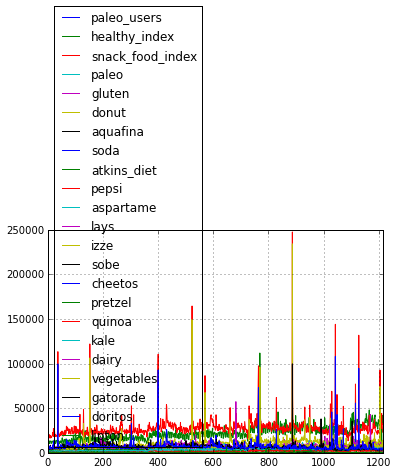

In [11]:
display(sampleData.plot())

Focus the story.

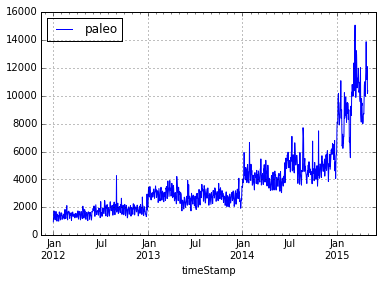

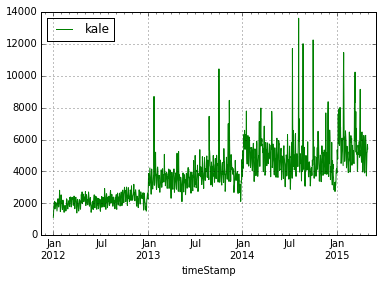

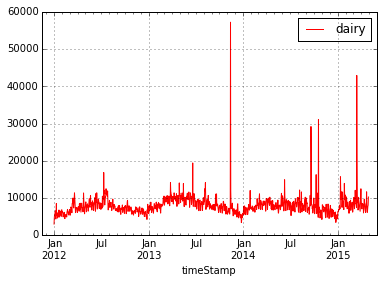

In [12]:
paleo = sampleData.plot(
    x='timeStamp'
    ,y='paleo'
    ,kind='line'
    ,xlim=['2011-11-15 00:00:00','2015-06-01 00:00:00']
    ,color='b')
paleo.legend(['paleo'], loc='best')
kale = sampleData.plot(
    x='timeStamp'
    ,y='kale'
    ,kind='line'
    ,xlim=['2011-11-15 00:00:00','2015-06-01 00:00:00']
    ,color='g')
kale.legend(['kale'], loc='best')
dairy = sampleData.plot(
    x='timeStamp'
    ,y='dairy'
    ,kind='line'
    ,xlim=['2011-11-15 00:00:00','2015-06-01 00:00:00']
    ,color='r')
dairy.legend(['dairy'], loc='best')
plt.show()

Narrow the focus.

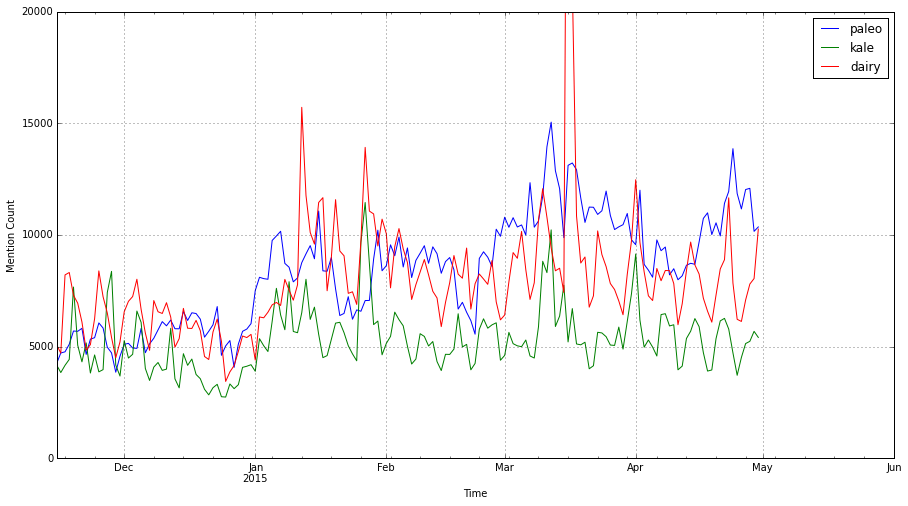

In [13]:
paleo = sampleData.plot(
    x='timeStamp'
    ,y='paleo'
    ,kind='line'
    ,xlim=['2011-11-15 00:00:00','2015-06-01 00:00:00'])
paleo.legend(['paleo'], loc='best')
kale = sampleData.plot(
    x='timeStamp'
    ,y='kale'
    ,kind='line'
    ,xlim=['2011-11-15 00:00:00','2015-06-01 00:00:00']
    ,ax = paleo)
kale.legend(['paleo','kale'], loc='best')
dairy = sampleData.plot(
    x='timeStamp'
    ,y='dairy'
    ,kind='line'
    ,xlim = ['2014-11-15 00:00:00','2015-06-01 00:00:00']
    ,ylim = [0,20000]
    ,ax=kale
    ,figsize =(15,8))
dairy.legend(['paleo','kale','dairy'], loc='best')
dairy.set_xlabel("Time")
dairy.set_ylabel("Mention Count")
plt.show()

####Similar experiences for R
Familiarity with a language is important to consider when running on deadlines. There's always a tradeoff between learning the new tool and using what you know.

In [14]:
# find min date
minDate = sampleData['timeStamp'].min()
minDate = minDate.strftime('%Y-%m-%d %H:%M')

# find max date
maxDate = sampleData['timeStamp'].max()
maxDate = maxDate.strftime('%Y-%m-%d %H:%M')

display(minDate, maxDate)
# send dataframe and strings to R
%Rpush sampleData minDate maxDate


'2012-01-01 00:00'

'2015-04-30 00:00'

In [15]:
%%R
# convert to date object in R
minDate = as.POSIXct(strptime(minDate, '%Y-%m-%d %H:%M',tz='UTC'))
maxDate = as.POSIXct(strptime(maxDate, '%Y-%m-%d %H:%M',tz='UTC'))
xlim = list(as.POSIXct('2014-11-15 00:00:00',format='%Y-%m-%d %H:%M',tz='UTC')
         ,as.POSIXct('2015-06-01 00:00:00',format='%Y-%m-%d %H:%M',tz='UTC'))
class(c(maxDate,xlim[[1]]))

[1] "POSIXct" "POSIXt" 


####Plotting w/ R
I am more familiar with the ggplot library than I am with matplotlib/Pandas. 


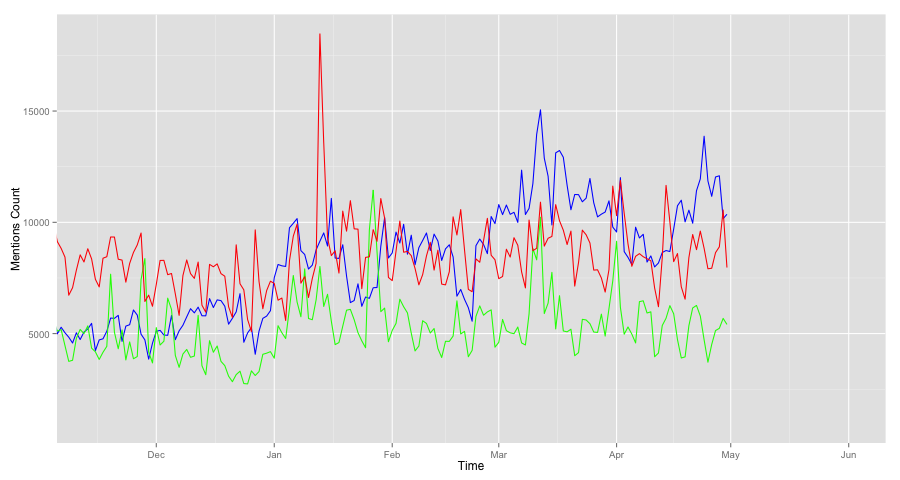

In [16]:
%%R -w 900 -h 480 -u px

p0 = ggplot(data=sampleData)
p0 = p0 + geom_line(aes(x=timeStamp,y=paleo),color='blue')
p0 = p0 + geom_line(aes(x=timeStamp,y=kale),color='green')
p0 = p0 + geom_line(aes(x=timeStamp,y=gluten),color='red')
p0 = p0 + scale_x_datetime(limits=c(xlim[[1]],xlim[[2]]))
p0 = p0 + xlab('Time')+ylab('Mentions Count')

print(p0)


####The Legend

In [17]:
df = sampleData.ix[:,('timeStamp','paleo','kale','dairy')]
display(df.head())
dfMelt = pd.melt(df, id_vars=['timeStamp'])
display(dfMelt.head())
%Rpush dfMelt df

,timeStamp,paleo,kale,dairy
0,2012-01-01,957,1116,2994
1,2012-01-02,1392,1484,4645
2,2012-01-03,1677,1782,5445
3,2012-01-04,1736,1991,5541
4,2012-01-05,1504,1994,6160


,timeStamp,variable,value
0,2012-01-01,paleo,957
1,2012-01-02,paleo,1392
2,2012-01-03,paleo,1677
3,2012-01-04,paleo,1736
4,2012-01-05,paleo,1504


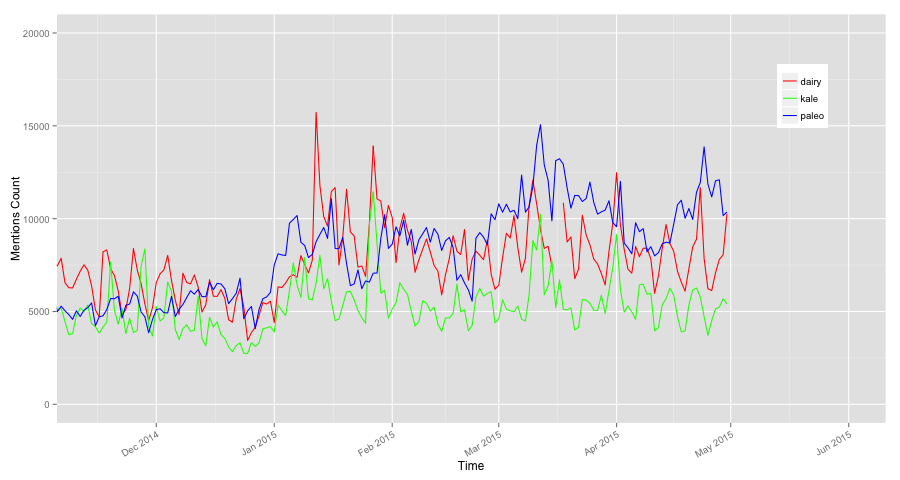

In [18]:
%%R -w 900 -h 480 -u px
p1 = ggplot(data=dfMelt)
p1 = p1 + geom_line(aes(x=timeStamp,y=value,color=variable))
p1 = p1 + scale_x_datetime( limits = c(xlim[[1]],xlim[[2]]), labels=date_format("%b %Y"))
p1 = p1 + ylim(0,20000)+xlab('Time')+ylab('Mentions Count')
p1 = p1 + scale_color_manual(values=c('red','green','blue'))
p1 = p1 + theme(legend.title=element_blank(), axis.text.x = element_text(angle = 30, hjust = 1), legend.position = c(.9, .8))
print(p1)

In [19]:
%%R
#save data
write.csv(df,"../data/df.csv", row.names=FALSE)
write.csv(dfMelt, "../data/dfMelt.csv", row.names=FALSE)

In [23]:
d3_example.plot_lines(id=3)

In [22]:
data = [{'x': 10, 'y': 20, 'r': 15, 'name': 'circle one'}, 
        {'x': 40, 'y': 40, 'r': 5, 'name': 'circle two'},
        {'x': 20, 'y': 30, 'r': 8, 'name': 'circle three'},
        {'x': 25, 'y': 10, 'r': 10, 'name': 'circle four'}]


d3_example.plot_circle(data)

In [ ]:

sampleData['donut_sum'] = sampleData.grouby(['Year','Month'])['donut'].transform(np.sum)

In [ ]:
sampleData.to_csv("../data/test.csv",index=False)

In [ ]:
d3_example.plot_circle(data, id=2)